In [62]:
from sklearn.datasets import load_digits;
import matplotlib.pyplot as plt;
from sklearn.cross_validation import train_test_split;
from sklearn import metrics;
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits();

imagens = digits.images
x_data = digits.data
y_data = digits.target 


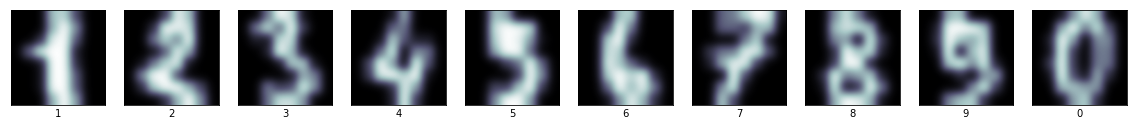

In [41]:
#Aqui criamos a figura principal do plot
fig = plt.figure(figsize=(20,20))

#Aqui plotamos cada uma das imagens e suas respectivas labels
for x in range(1,11):
    fig.add_subplot(4,10,x,xticks=[],yticks=[])
    plt.imshow(imagens[x],cmap=plt.cm.bone,interpolation='gaussian')
    if x <= 9:
        plt.xlabel(str(x))
    else:
        plt.xlabel(str(0))
        
plt.show()

## Etapa de treino e teste

In [58]:
#Irei preparar o conjunto de treino e teste.
#Deicharemos 200 para teste.
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size = 200);

len(y_train)

1597

In [59]:
#instanciamos a classe.
#Nada impede de treiná-lo logo em seguida.

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

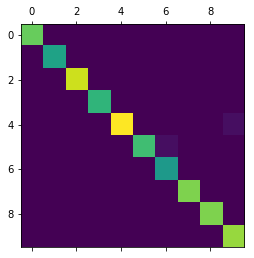

In [74]:
#Aqui armazeno as predições do algoritmo
#No caso aplicamos ele ao conjunto de teste
#Essa variavel servira para fazermos algumas métricas.
predictions = knn.predict(x_test);

## Test our model
metrics.accuracy_score(y_test, predictions)

# metrics.confusion_matrix(y_test,predictions);

import matplotlib.pyplot as plt;
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,predictions)
plt.matshow(cm);

plt.show()

In [76]:
#quais são os dez vizinhos mais próximos do mesmo. 
#Repare que ele retorna duas arrays a primeira contendo as distâncias 
#e a segunda contendo o índice de cada uma das instâncias.
knn.kneighbors(x_test[0],n_neighbors=10)


/Users/clovisneto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 26.94438717,  27.29468813,  27.31300057,  27.31300057,
          27.67670501,  27.78488798,  27.94637722,  28.12472222,
          28.21347196,  28.7923601 ]]),
 array([[ 450, 1537,   91, 1343,  628, 1408, 1165,  783,  773,  567]]))

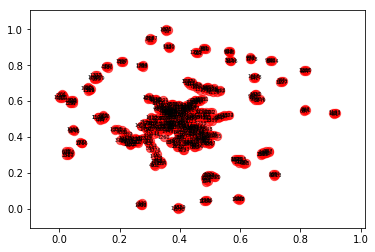

In [84]:
import networkx as nx;

matrix = knn.kneighbors_graph(x_test,mode='distance',n_neighbors=3)
matrix = matrix.toarray()

g = nx.Graph()

for x in range(len(matrix)):
    for y in range(len(matrix[x])):
        if matrix[x][y] != 0.0:
            g.add_edge(str(x),str(y),weight=matrix[x][y])

nx.draw_networkx(g,alpha=0.6,node_size=70,font_size=5)
plt.show()